In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('fifa_players (1).csv')

In [3]:
df.shape

(17954, 51)

In [4]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [6]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


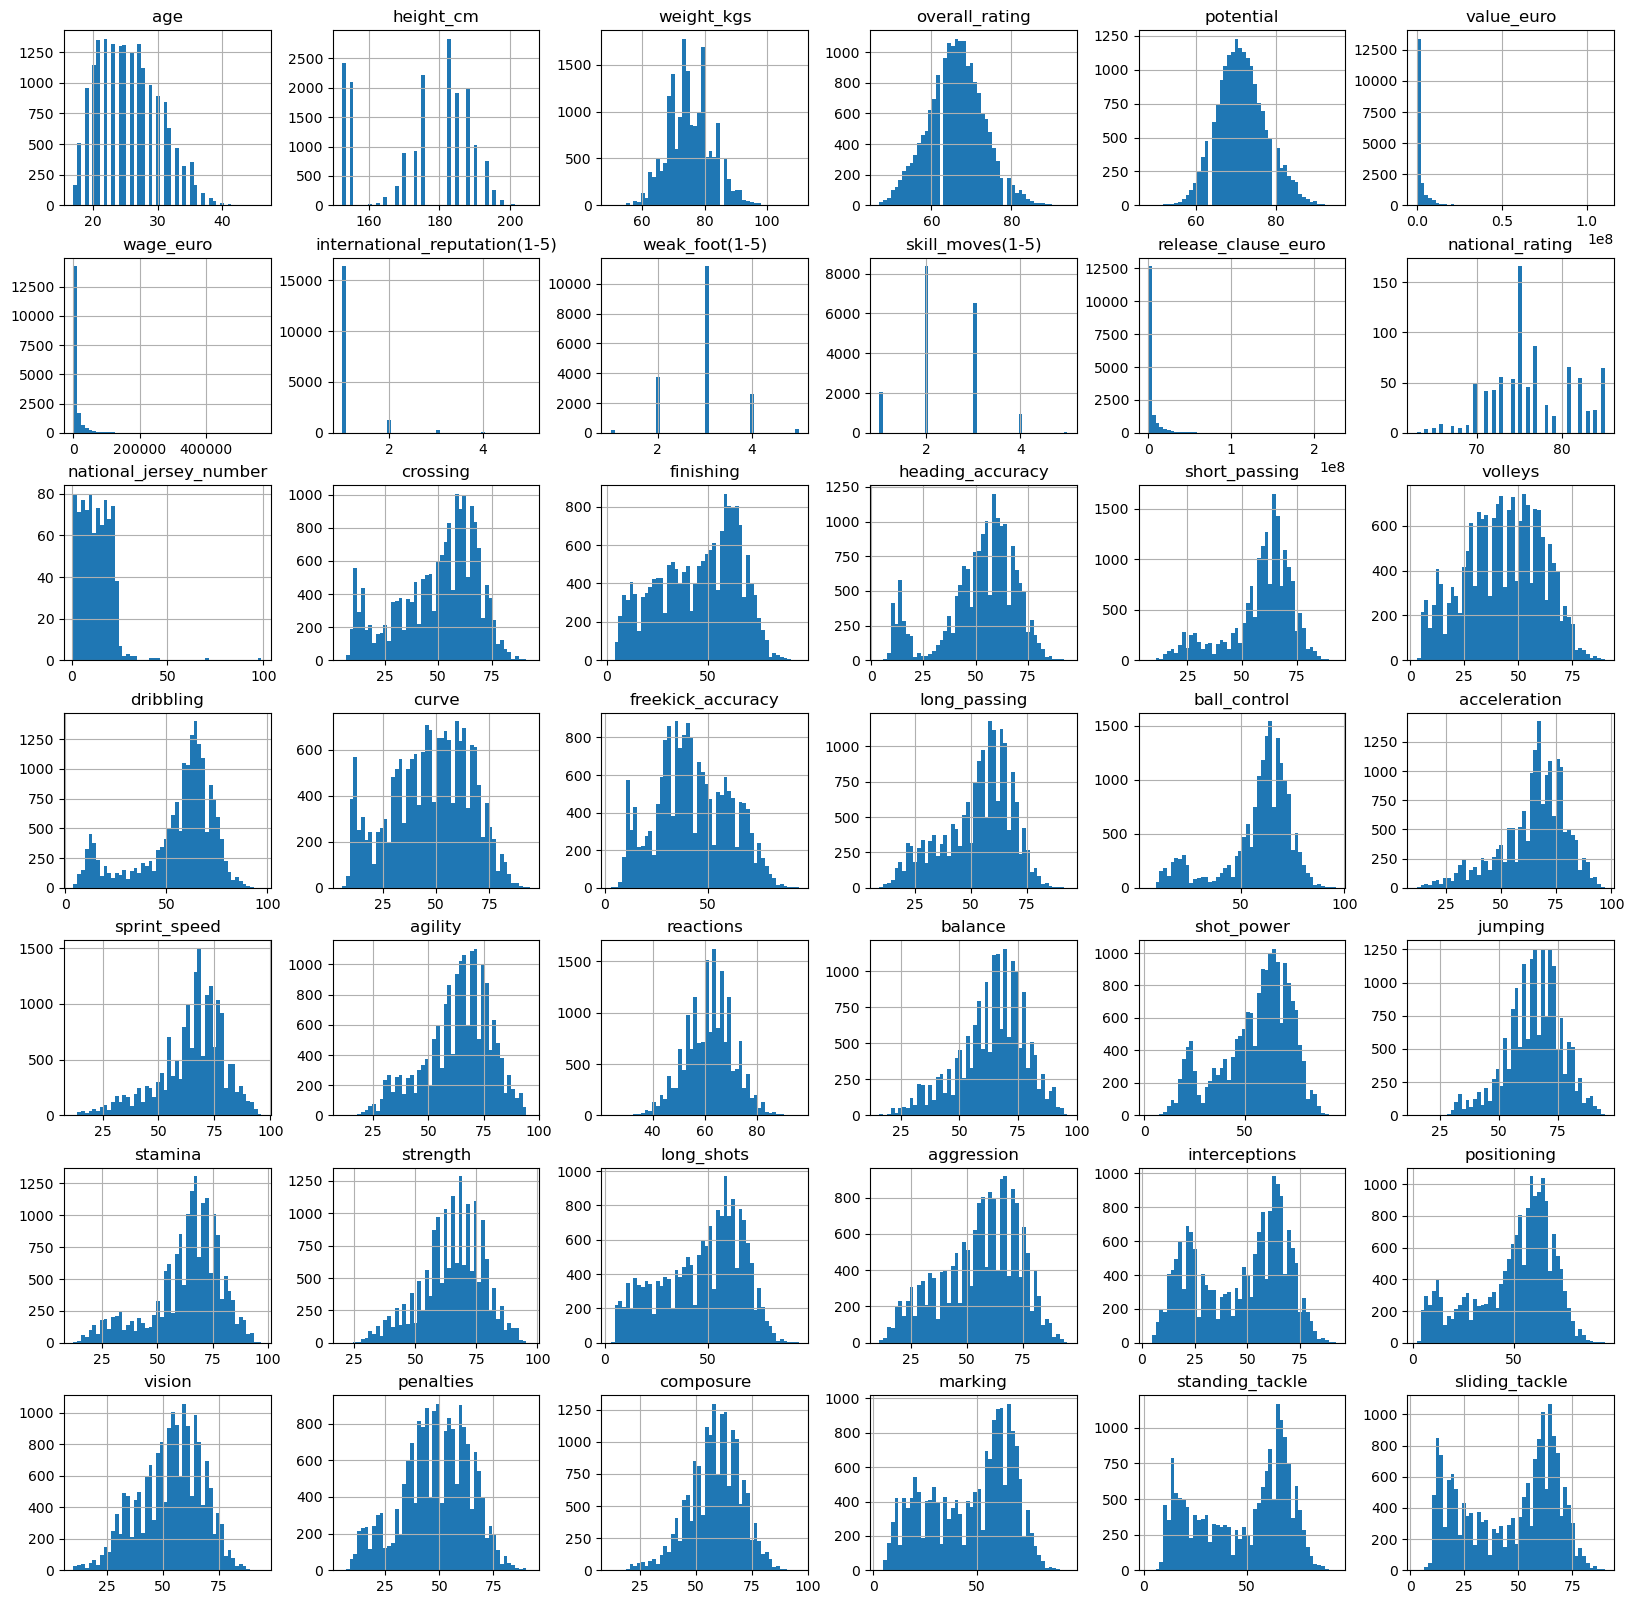

In [7]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [8]:
overall_rating_distribution = df['overall_rating'].value_counts(normalize=True) * 100
overall_rating_distribution

overall_rating
66    6.059931
67    5.981954
68    5.965245
64    5.887267
65    5.798151
63    5.363707
70    5.179904
69    5.074078
62    4.728751
71    4.478111
72    4.099365
61    3.848725
60    3.458839
73    3.369723
74    3.119082
59    2.695778
75    2.656790
58    2.550964
57    2.272474
76    2.077531
56    1.843600
77    1.604099
55    1.537262
54    1.420296
53    1.264342
79    0.991423
78    0.974713
52    0.919015
80    0.746352
51    0.668375
82    0.556979
50    0.545839
81    0.462293
83    0.401025
49    0.250641
84    0.245071
48    0.183803
85    0.172663
47    0.116966
87    0.100256
86    0.094686
88    0.089117
89    0.055698
90    0.044558
91    0.027849
94    0.011140
92    0.005570
Name: proportion, dtype: float64

In [9]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [10]:
df['value_euro'].fillna(df['value_euro'].mean(), inplace=True)
df['wage_euro'].fillna(df['wage_euro'].mean(), inplace=True)
df['release_clause_euro'].fillna(df['release_clause_euro'].mean(), inplace=True)

C:\Users\tuann\AppData\Local\Temp\ipykernel_1640\2011167581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['value_euro'].fillna(df['value_euro'].mean(), inplace=True)
C:\Users\tuann\AppData\Local\Temp\ipykernel_1640\2011167581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

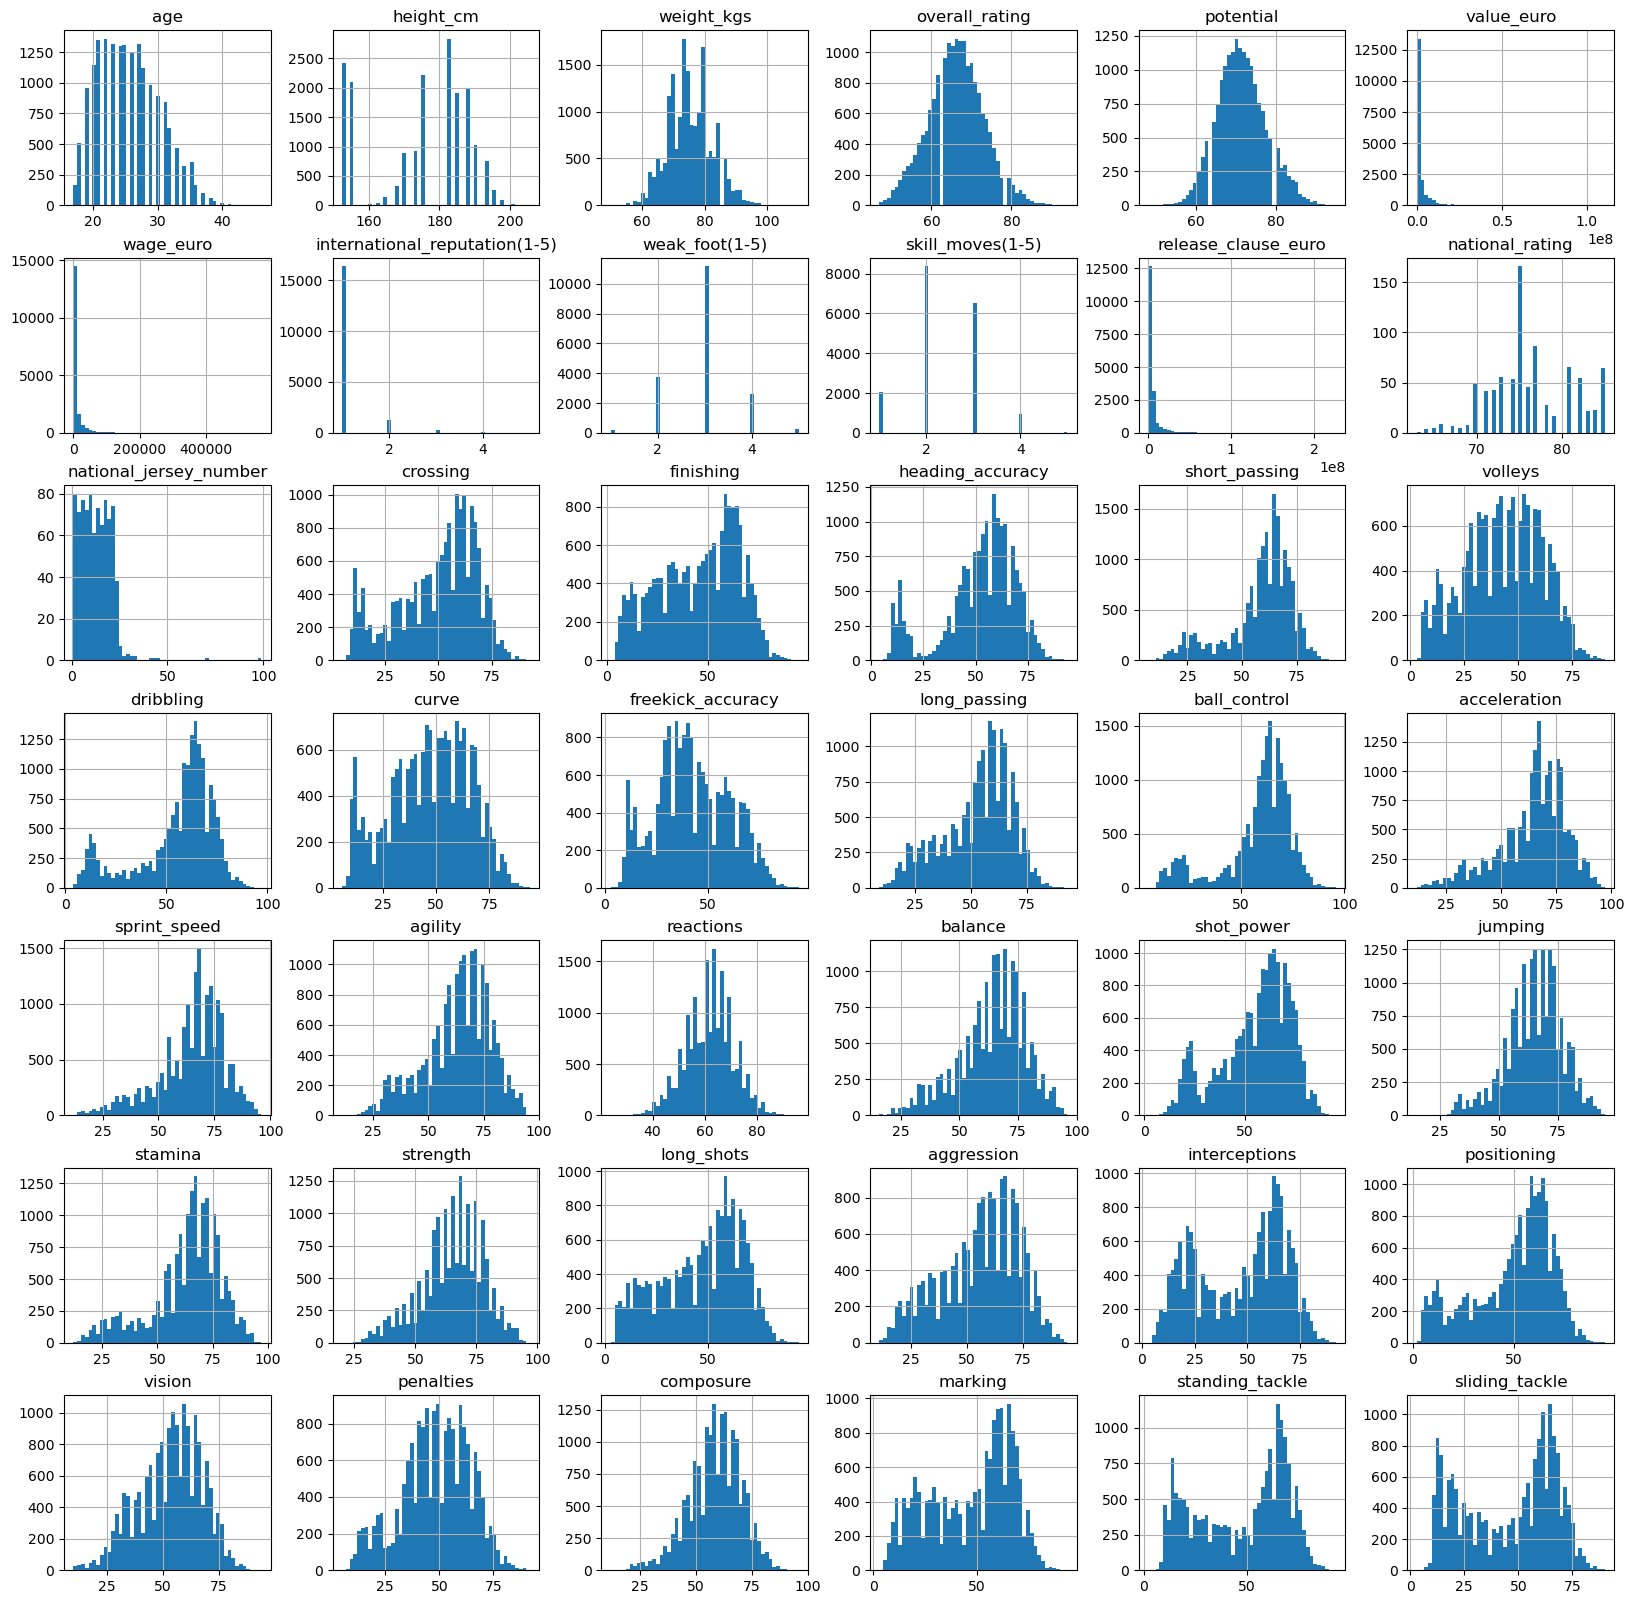

In [11]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [12]:
df['national_team'].fillna('Not in national team', inplace=True)
df['national_team_position'].fillna('Not in national team', inplace=True)
df['national_rating'].fillna(0, inplace=True)
df['national_jersey_number'].fillna(0, inplace=True)

C:\Users\tuann\AppData\Local\Temp\ipykernel_1640\2353873178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['national_team'].fillna('Not in national team', inplace=True)
C:\Users\tuann\AppData\Local\Temp\ipykernel_1640\2353873178.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [13]:
df.isnull().sum()

name                             0
full_name                        0
birth_date                       0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
value_euro                       0
wage_euro                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
release_clause_euro              0
national_team                    0
national_rating                  0
national_team_position           0
national_jersey_number           0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve               

In [14]:
df.shape

(17954, 51)

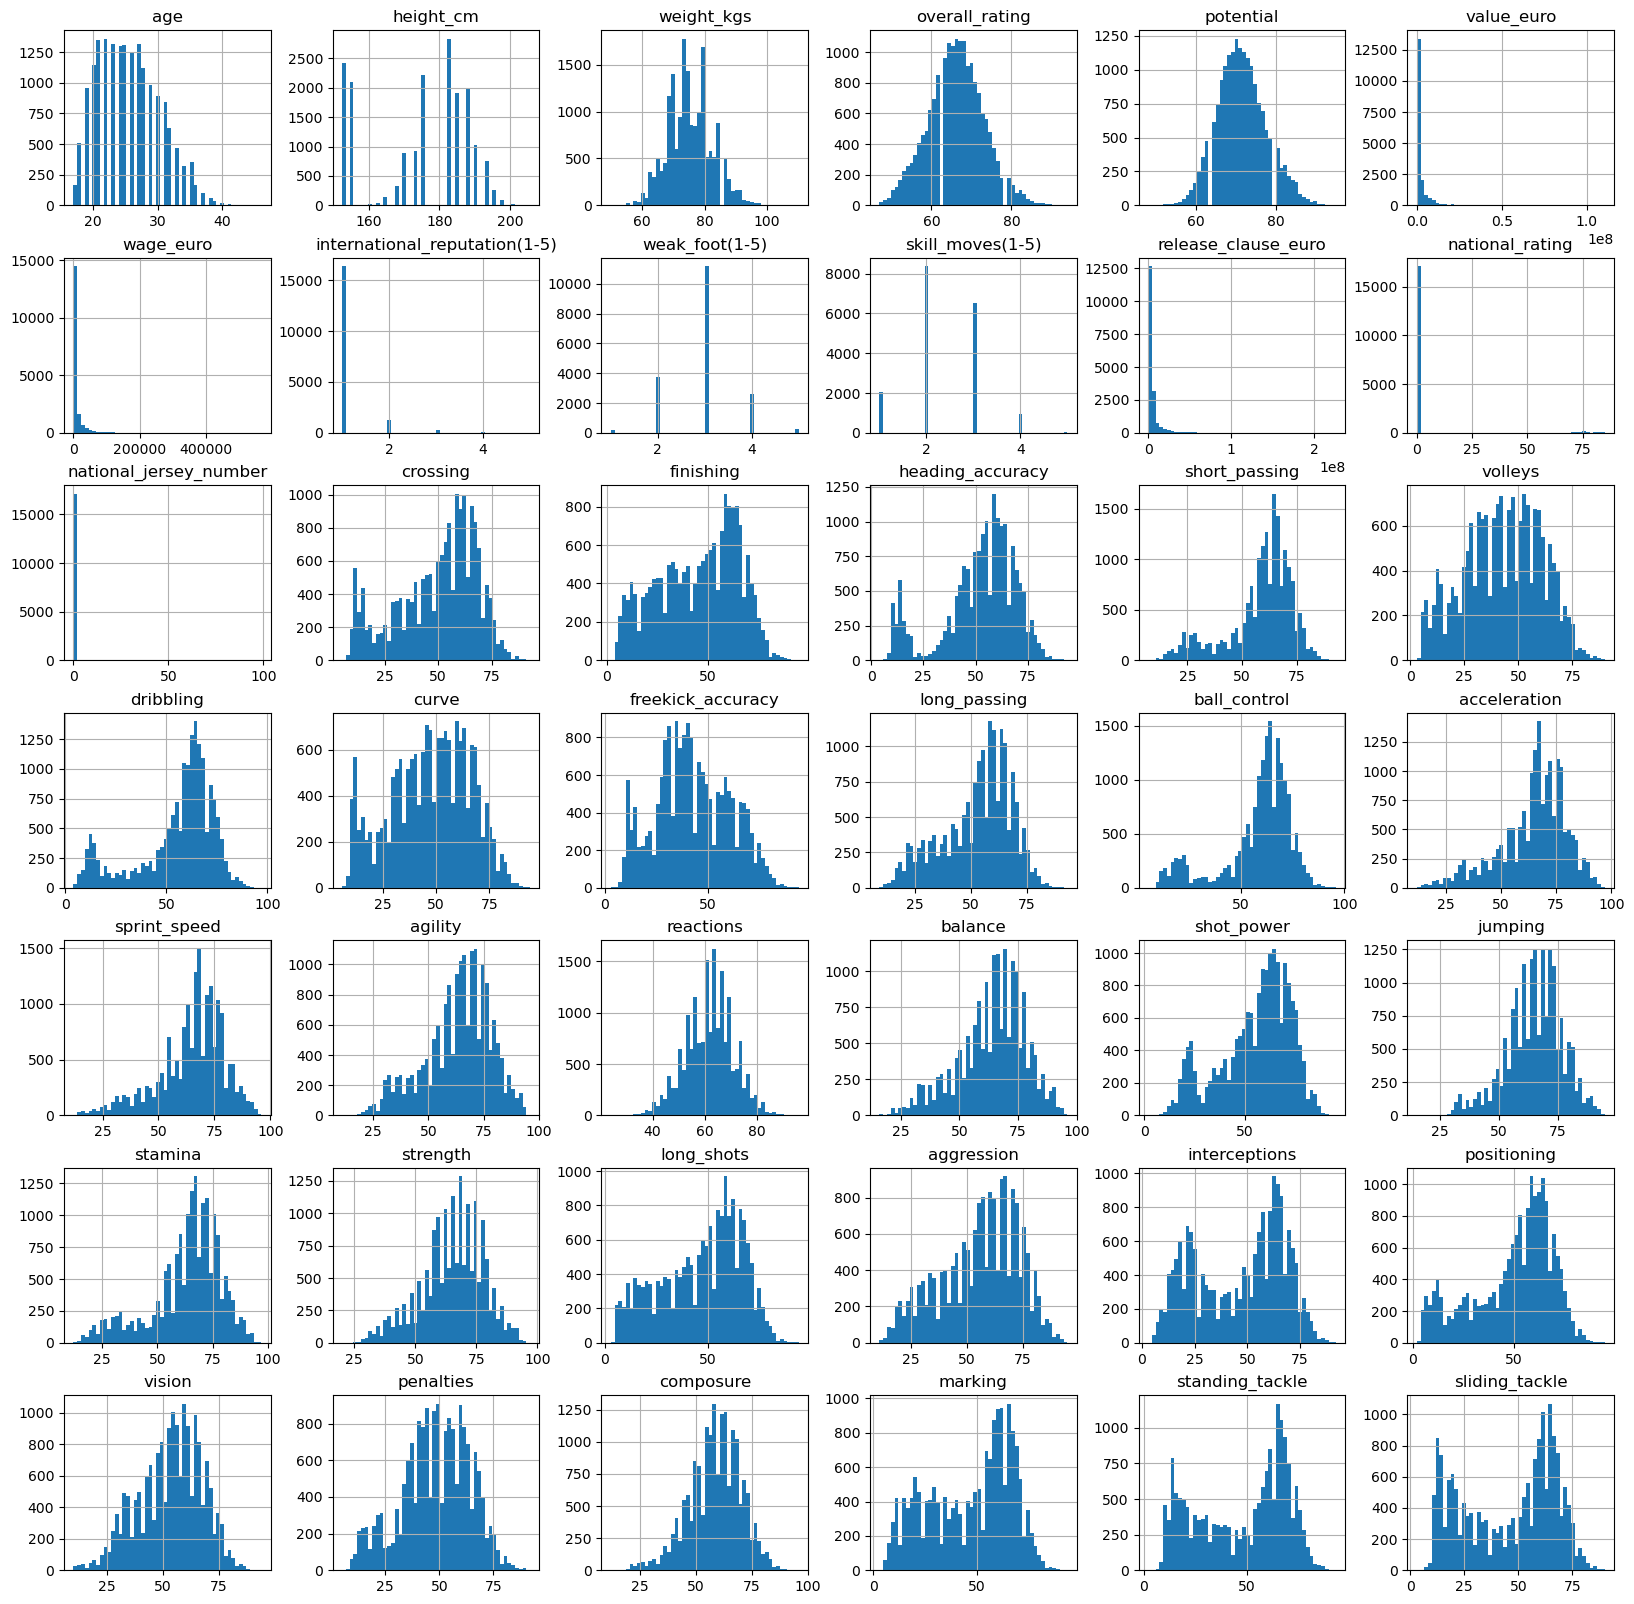

In [15]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [16]:
df['value_euro_log'] = np.log1p(df['value_euro']) 
df['wage_euro_log'] = np.log1p(df['wage_euro'])
df['release_clause_euro_log'] = np.log1p(df['release_clause_euro'])

In [17]:
df.drop(['value_euro','wage_euro','release_clause_euro'], axis=1, inplace=True)

In [18]:
df.shape

(17954, 51)

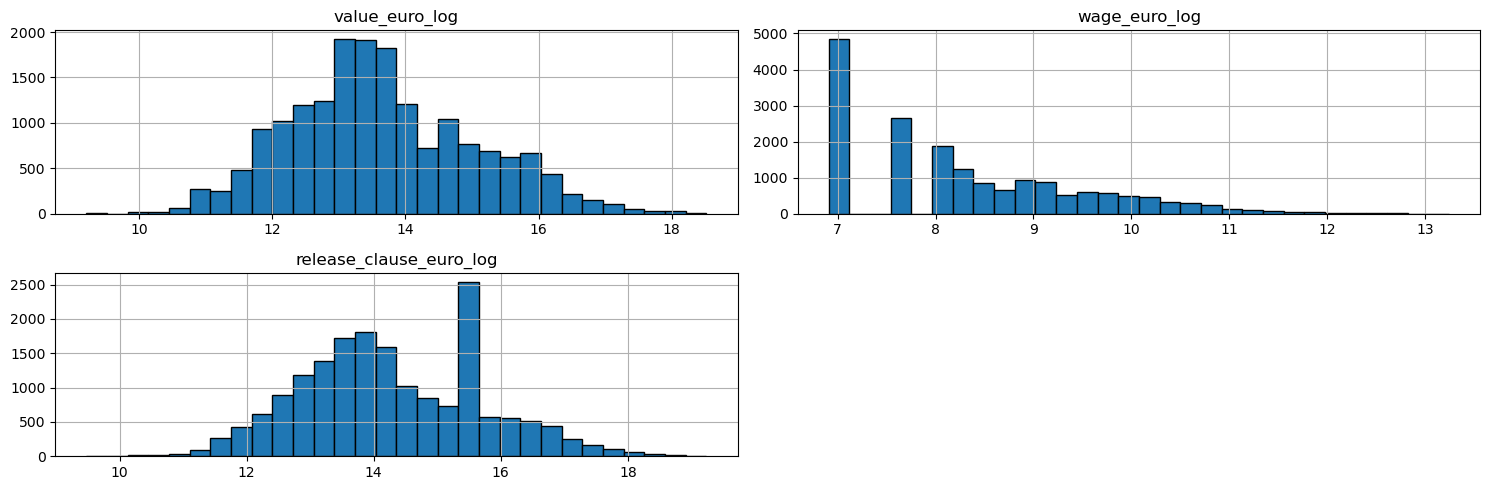

In [19]:
df[['value_euro_log', 'wage_euro_log', 'release_clause_euro_log']].hist(figsize=(15, 5), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


In [20]:
df.drop(['name', 'full_name', 'birth_date', 'national_team', 'national_rating', 'national_team_position',
         'national_jersey_number'], axis=1, inplace=True)

In [21]:
df.shape

(17954, 44)

In [22]:
df.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,value_euro_log,wage_euro_log,release_clause_euro_log
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,Left,5,4,...,94,94,75,96,33,28,26,18.520526,13.244583,19.238256
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,Right,3,5,...,84,91,67,88,59,57,22,18.056837,12.230770,18.711857
2,25,190.50,83.9,"CM,CAM",France,88,91,Right,4,4,...,82,88,82,87,63,67,67,18.105970,12.449023,18.786712
3,27,162.56,59.0,"LW,ST",Italy,88,88,Right,3,4,...,83,87,61,83,51,24,22,17.942645,12.013707,18.473273
4,27,187.96,88.9,CB,Senegal,88,91,Right,3,3,...,24,49,33,80,91,88,87,17.909855,11.813037,18.483656


In [23]:
correlation_height_weight = df['height_cm'].corr(df['weight_kgs'])
correlation_height_weight


0.49532035891922177

In [27]:
outliers = df[df['height_cm'] < 160]
valid_height = df[df['height_cm'] >= 160]
correlation_height_weight = valid_height['height_cm'].corr(valid_height['weight_kgs'])
correlation_height_weight

0.7885696032820835

In [225]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
X_train = valid_height['weight_kgs'].values.reshape(-1, 1)
y_train = valid_height['height_cm'].values
linear_regression.fit(X_train, y_train)

LinearRegression()

In [226]:
X_outliers = outliers['weight_kgs'].values.reshape(-1, 1)
predicted_heights = linear_regression.predict(X_outliers)

In [227]:
df.loc[df['height_cm'] < 160, 'height_cm'] = predicted_heights

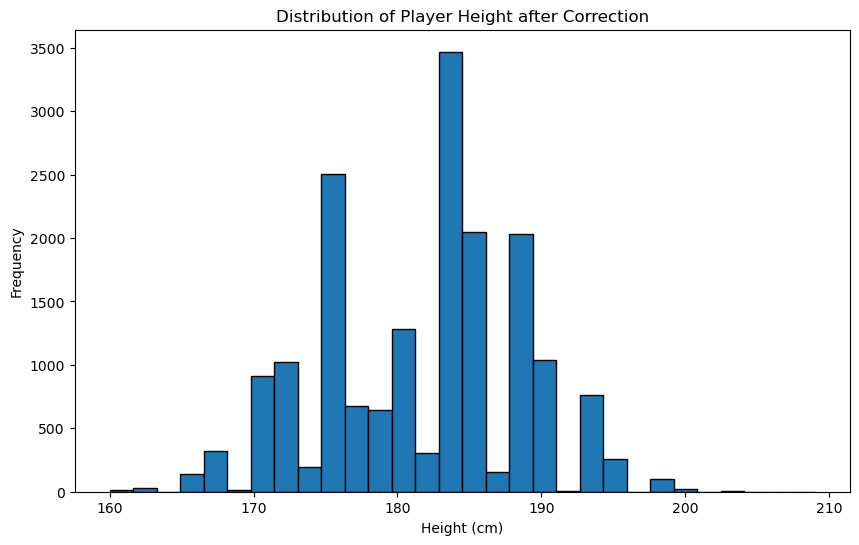

In [228]:
plt.figure(figsize=(10, 6))
plt.hist(df['height_cm'], bins=30, edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Height after Correction')
plt.show()

In [229]:
correlation_height_weight = df['height_cm'].corr(df['weight_kgs'])
correlation_height_weight


0.8094375795794008

In [230]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['preferred_foot'] = le.fit_transform(df['preferred_foot'])

In [231]:
df.shape

(17954, 44)

In [232]:
nationality_counts = df['nationality'].value_counts()
nationality_counts

nationality
England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
Papua New Guinea           1
South Sudan                1
Malta                      1
Yemen                      1
United Arab Emirates       1
Name: count, Length: 160, dtype: int64

In [233]:
from sklearn.preprocessing import OneHotEncoder

top_20_nationalities = df['nationality'].value_counts().nlargest(20).index
df['nationality_top_20'] = df['nationality'].apply(lambda x: x if x in top_20_nationalities else 'Other')


one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') 
nationality_encoded = one_hot_encoder.fit_transform(df[['nationality_top_20']])

nationality_encoded_df = pd.DataFrame(nationality_encoded, columns=one_hot_encoder.get_feature_names_out(['nationality_top_20']))
df = pd.concat([df, nationality_encoded_df], axis=1)

df.drop(['nationality', 'nationality_top_20'], axis=1, inplace=True)
df.head()


,age,height_cm,weight_kgs,positions,overall_rating,potential,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,nationality_top_20_Mexico,nationality_top_20_Netherlands,nationality_top_20_Norway,nationality_top_20_Other,nationality_top_20_Poland,nationality_top_20_Portugal,nationality_top_20_Republic of Ireland,nationality_top_20_Spain,nationality_top_20_Sweden,nationality_top_20_United States
0,31,170.180000,72.1,"CF,RW,ST",94,94,0,5,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27,182.284925,76.2,"CAM,RM,CM",88,89,1,3,5,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,190.500000,83.9,"CM,CAM",88,91,1,4,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,162.560000,59.0,"LW,ST",88,88,1,3,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,187.960000,88.9,CB,88,91,1,3,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
df.shape

(17954, 63)

In [235]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'overall_rating',
       'potential', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'value_euro_log', 'wage_euro_log', 'release_clause_euro_log',
       'nationality_top_20_Brazil', 'nationality_top_20_Chile',
       'nationality_top_20_China PR', 'nationality_top_20_Colombia',
       'nationality_top_20_England', 'nationality_top_20_France',
       'nationality_top_20_Germany', 'nationality_top_20_Italy',
       'nationali

In [236]:
df.select_dtypes(include=['object']).nunique()

positions    890
body_type     10
dtype: int64

In [237]:
one_hot_encoder_body_type = OneHotEncoder(sparse_output=False, drop='first')
body_type_encoded = one_hot_encoder_body_type.fit_transform(df[['body_type']])

body_type_encoded_df = pd.DataFrame(body_type_encoded, columns=one_hot_encoder_body_type.get_feature_names_out(['body_type']))
df = pd.concat([df, body_type_encoded_df], axis=1)

df.drop(['body_type'], axis=1, inplace=True)

df.head()

,age,height_cm,weight_kgs,positions,overall_rating,potential,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,nationality_top_20_United States,body_type_C. Ronaldo,body_type_Courtois,body_type_Lean,body_type_Messi,body_type_Neymar,body_type_Normal,body_type_PLAYER_BODY_TYPE_25,body_type_Shaqiri,body_type_Stocky
0,31,170.180000,72.1,"CF,RW,ST",94,94,0,5,4,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,27,182.284925,76.2,"CAM,RM,CM",88,89,1,3,5,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,190.500000,83.9,"CM,CAM",88,91,1,4,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,27,162.560000,59.0,"LW,ST",88,88,1,3,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,27,187.960000,88.9,CB,88,91,1,3,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [238]:
df.shape

(17954, 71)

In [239]:
unique_positions = set()

for pos_list in df['positions']:
    positions = pos_list.split(',')
    unique_positions.update(positions)

num_unique_positions = len(unique_positions)
unique_positions, num_unique_positions

({'CAM',
  'CB',
  'CDM',
  'CF',
  'CM',
  'GK',
  'LB',
  'LM',
  'LW',
  'LWB',
  'RB',
  'RM',
  'RW',
  'RWB',
  'ST'},
 15)

In [240]:
df.shape

(17954, 71)

In [241]:
df.shape

(17954, 71)

In [242]:
from sklearn.preprocessing import MultiLabelBinarizer
df['positions_split'] = df['positions'].apply(lambda x: x.split(','))

mlb = MultiLabelBinarizer()

positions_encoded = mlb.fit_transform(df['positions_split'])
positions_encoded_df = pd.DataFrame(positions_encoded, columns=mlb.classes_, index=df.index)
df = pd.concat([df, positions_encoded_df], axis=1)

df.drop(['positions', 'positions_split'], axis=1, inplace=True)

df.head()

,age,height_cm,weight_kgs,overall_rating,potential,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),crossing,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,31,170.180000,72.1,94,94,0,5,4,4,86,...,0,0,0,0,0,0,0,1,0,1
1,27,182.284925,76.2,88,89,1,3,5,4,88,...,0,0,0,0,0,0,1,0,0,0
2,25,190.500000,83.9,88,91,1,4,4,5,80,...,0,0,0,0,0,0,0,0,0,0
3,27,162.560000,59.0,88,88,1,3,4,4,86,...,0,0,0,1,0,0,0,0,0,1
4,27,187.960000,88.9,88,91,1,3,3,2,30,...,0,0,0,0,0,0,0,0,0,0


In [243]:
df.shape

(17954, 85)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 85 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     17954 non-null  int64  
 1   height_cm                               17954 non-null  float64
 2   weight_kgs                              17954 non-null  float64
 3   overall_rating                          17954 non-null  int64  
 4   potential                               17954 non-null  int64  
 5   preferred_foot                          17954 non-null  int32  
 6   international_reputation(1-5)           17954 non-null  int64  
 7   weak_foot(1-5)                          17954 non-null  int64  
 8   skill_moves(1-5)                        17954 non-null  int64  
 9   crossing                                17954 non-null  int64  
 10  finishing                               17954 non-null  in

In [245]:
from sklearn.model_selection import train_test_split

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
overall_rating_distribution = df['overall_rating'].value_counts(normalize=True) * 100
overall_rating_distribution

overall_rating
66    6.059931
67    5.981954
68    5.965245
64    5.887267
65    5.798151
63    5.363707
70    5.179904
69    5.074078
62    4.728751
71    4.478111
72    4.099365
61    3.848725
60    3.458839
73    3.369723
74    3.119082
59    2.695778
75    2.656790
58    2.550964
57    2.272474
76    2.077531
56    1.843600
77    1.604099
55    1.537262
54    1.420296
53    1.264342
79    0.991423
78    0.974713
52    0.919015
80    0.746352
51    0.668375
82    0.556979
50    0.545839
81    0.462293
83    0.401025
49    0.250641
84    0.245071
48    0.183803
85    0.172663
47    0.116966
87    0.100256
86    0.094686
88    0.089117
89    0.055698
90    0.044558
91    0.027849
94    0.011140
92    0.005570
Name: proportion, dtype: float64

In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [249]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [250]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled_pca, y_train)
y_pred = linear_regression.predict(X_test_scaled_pca)

In [251]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f' % mse)
print('Mean absolute error: %.2f' % mae)
print('R2 score: %.2f' % r2)


Mean squared error: 2.58
Mean absolute error: 1.22
R2 score: 0.95


In [252]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [257]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score(y_test, y_pred)
print('Mean squared error: %.2f' % mse)
print('Mean absolute error: %.2f' % mae)
print('R2 score: %.2f' % r2)

Mean squared error: 0.23
Mean absolute error: 0.27
R2 score: 0.92


In [260]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f' % mse)
print('Mean absolute error: %.2f' % mae)
print('R2 score: %.2f' % r2)

Mean squared error: 0.26
Mean absolute error: 0.33
R2 score: 0.99
